In [2]:
# import sys
# sys.path.append('thirdparty/insightface/python-package')


In [7]:
from insightface.app import FaceAnalysis
import insightface
import cv2


In [45]:
from numpy.linalg import norm as l2norm

def normed_embedding(embedding):
    return embedding / l2norm(embedding)


In [9]:
reg_model = insightface.model_zoo.get_model(
    "ckpts/models/buffalo_l/w600k_r50.onnx", providers=["CUDAExecutionProvider"]
)
reg_model.prepare(ctx_id=1)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


In [61]:
from glob import glob

all_folders = glob("/mnt/DATA2/congvm/Affwild2/cropped_aligned/*")
all_folders = [f.split("/")[-1] for f in all_folders]
all_folders[-1]


'421'

In [82]:
feats = []
for f in all_folders[:200]:
    path = glob(f"/mnt/DATA2/congvm/Affwild2/cropped_aligned/{f}/*")[0]
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats.append(features)


In [11]:
# Example from insightface
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

app = FaceAnalysis(
    root="ckpts",
    allowed_modules=["recognition"],
    providers=["CUDAExecutionProvider"],
)
app.prepare(ctx_id=0, det_size=(640, 640))

img = ins_get_image("t1")
faces = app.get(img)
rimg = app.draw_on(img, faces)
plt.imshow(rimg[..., ::-1])

normed_feats = []
feats = []

for face in faces:
    normed_feats.append(face.normed_embedding)
    feats.append(face.embedding)

print(feats[0].shape)
print(normed_feats[0].shape)


In [83]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


In [84]:
feats_x = np.stack(feats)
print(feats_x.shape)
feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1])


(200, 512)


## Load and check facial features

In [16]:
import pandas as pd
import os
import sys
import numpy as np
from glob import glob

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [line.strip().split(',') for line in lines]
        return lines


def load_image(img_path):
    img_arr = cv2.imread(img_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)



100%|██████████| 200/200 [00:08<00:00, 24.99it/s]


(200, 512)


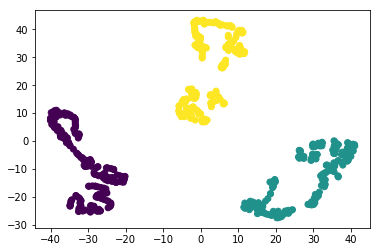

In [28]:
csv_path = "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0]*len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1]*len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2]*len(feats_2_x)

print(feats_x.shape)
# print(feats_1_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)


100%|██████████| 200/200 [00:07<00:00, 25.00it/s]


(200, 512)


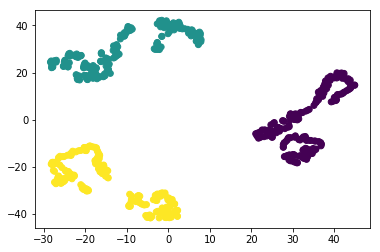

In [60]:
## W/o normalization
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = reg_model.get_feat(img_arr).flatten()
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)
# print(feats_1_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)


In [48]:
import torch
import torch.nn as nn
from thirdparty.insightface.recognition.arcface_torch.backbones import iresnet50
import cv2
from albumentations.core.transforms_interface import ImageOnlyTransform
import numpy as np


class ArcFaceTransform(ImageOnlyTransform):
    def __init__(self, input_size, always_apply=True, p=1.0):
        super(ArcFaceTransform, self).__init__(always_apply, p)
        self.input_size = input_size  # (112, 112)
        self.input_mean = 127.5
        self.input_std = 127.5

    def apply(self, img, **params):
        # img = cv2.resize(img, self.input_size)
        img = cv2.dnn.blobFromImages(
            [img],
            1.0 / self.input_std,
            self.input_size,
            (self.input_mean, self.input_mean, self.input_mean),
            swapRB=False,
        )[0]
        return img.transpose((1, 2, 0))

    def get_transform_init_args_names(self):
        return "input_size"


class ArcFaceIRes50(nn.Module):
    def __init__(self, ckpt=None):
        super().__init__()
        self.backbone = iresnet50()
        if ckpt is not None:
            state_dict = torch.load(ckpt)
            print(self.backbone.load_state_dict(state_dict))
        self.input_mean = 127.5
        self.input_std = 127.5

    def get_feat(self, imgs):
        if not isinstance(imgs, list):
            imgs = [imgs]
        input_size = self.input_size

        blob = cv2.dnn.blobFromImages(
            imgs,
            1.0 / self.input_std,
            input_size,
            (self.input_mean, self.input_mean, self.input_mean),
            swapRB=True,
        )
        net_out = self.session.run(self.output_names, {self.input_name: blob})[0]
        return net_out

    def forward(self, x):
        return self.backbone(x)
        # blob = (batch_data - self.input_mean) / self.input_std
        # net_out = self.session.run(self.output_names, {self.input_name: blob})[0]

    def get_feat(self, x):
        with torch.no_grad():
            emb = self(x).detach().cpu().numpy()
        return emb
        

In [55]:
import albumentations as A
from albumentations.pytorch import ToTensorV2


transform = A.Compose(
    [
        A.Resize(height=112, width=112),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        ArcFaceTransform(input_size=(112, 112)),
        ToTensorV2(),
    ]
)

img_path = "/mnt/DATA2/congvm/Affwild2/cropped_aligned/4-30-1920x1080/00002.jpg"
img_arr = cv2.imread(img_path)

img_arr_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
x1 = transform(image=img_arr_rgb)["image"].unsqueeze(0)
print(x1.shape)


torch.Size([1, 3, 112, 112])


In [56]:
model_r50 = ArcFaceIRes50(ckpt="ckpts/glint360k_cosface_r50_fp16_0.1_backbone.pth")
_ = model_r50.eval()
_ = model_r50.cuda()

<All keys matched successfully>


100%|██████████| 200/200 [00:01<00:00, 199.22it/s]


(200, 512)


Text(0.5, 1.0, 'Embedding with L2Norm')

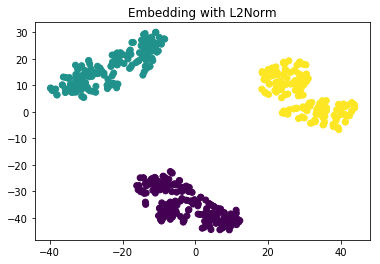

In [64]:
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = normed_embedding(model_r50.get_feat(img_arr).flatten())
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title("Embedding with L2Norm")


100%|██████████| 200/200 [00:00<00:00, 201.66it/s]


(200, 512)


Text(0.5, 1.0, 'Embedding w/o L2Norm')

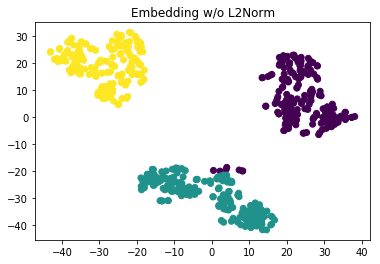

In [63]:
csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/163.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/113.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_1 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats_1.append(features)

csv_path = (
    "/mnt/DATA2/congvm/Affwild2/saved_labels/AU_Detection_Challenge/Train_Set/114.csv"
)
data_df = pd.read_csv(csv_path)
image_id_paths = data_df.image_id.values


feats_2 = []
for path in tqdm(image_id_paths[:200]):
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = transform(image=img_arr)["image"].unsqueeze(0).to("cuda")
    features = model_r50.get_feat(img_arr).flatten()
    feats_2.append(features)


feats_x = np.stack(feats)
labels_x = [0] * len(feats_x)
feats_1_x = np.stack(feats_1)
labels_1_x = [1] * len(feats_1_x)
feats_2_x = np.stack(feats_2)
labels_2_x = [2] * len(feats_2_x)

print(feats_x.shape)

feats_x_concat = np.concatenate([feats_x, feats_1_x, feats_2_x])
labels_x_concat = np.concatenate([labels_x, labels_1_x, labels_2_x])

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x_concat)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1], c=labels_x_concat)
plt.title('Embedding w/o L2Norm')